In [6]:
import pandas as pd
import numpy as np


import difflib as dff


from sklearn import tree 
from sklearn import svm 
import sklearn.linear_model as linear_model 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neural_network import MLPClassifier 
from sklearn.naive_bayes import GaussianNB 
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split


import sklearn.metrics as metrics
from sklearn import preprocessing


import matplotlib.pyplot as plt
%matplotlib inline


In [7]:
path_excel = r"C:\Users\SivaTharun\Downloads\Telegram Desktop\h1b_kaggle.csv"

In [8]:
column_names = ['CASE_STATUS', 'EMPLOYER_NAME','SOC_NAME', 'JOB_TITLE', 'FULL_TIME_POSITION', 'PREVAILING_WAGE', 'FILING_YEAR',\
               'WORKSITE', 'LONGITUDE', 'LATITUDE']
table_1 = pd.read_table(path_excel, names = column_names, skiprows = 1, error_bad_lines = False, sep = ',')

C:\Users\SivaTharun\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [9]:
pd.set_option('display.max_colwidth', -1)
pd.options.mode.chained_assignment = None

C:\Users\SIVATH~1\AppData\Local\Temp/ipykernel_7960/3108441976.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [10]:
table_1.head()

,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,FILING_YEAR,WORKSITE,LONGITUDE,LATITUDE
1,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016,"ANN ARBOR, MICHIGAN",-83.743038,42.280826
2,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016,"PLANO, TEXAS",-96.698886,33.019843
3,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016,"JERSEY CITY, NEW JERSEY",-74.077642,40.728158
4,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY OF TOMKINS PLC",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016,"DENVER, COLORADO",-104.990251,39.739236
5,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,2016,"ST. LOUIS, MISSOURI",-90.199404,38.627003


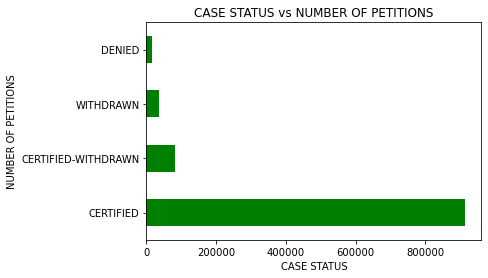

CERTIFIED              914251
CERTIFIED-WITHDRAWN    83160 
WITHDRAWN              35494 
DENIED                 15670 
Name: CASE_STATUS, dtype: int64


In [11]:
plot_status_numberinit = table_1['CASE_STATUS'].value_counts().plot(title = 'CASE STATUS vs NUMBER OF PETITIONS', \
                                                                kind = 'barh', color = 'green')
plot_status_numberinit.set_xlabel("CASE STATUS")
plot_status_numberinit.set_ylabel("NUMBER OF PETITIONS")
plt.show()
print(table_1['CASE_STATUS'].value_counts())

In [12]:
table_2 = table_1.loc[table_1['CASE_STATUS'].isin(["CERTIFIED", "DENIED", "REJECTED"])]

In [13]:
table_2['FILING_YEAR'] = table_2['FILING_YEAR'].astype(int)
table_2['EMPLOYER_NAME'] = table_2['EMPLOYER_NAME'].str.upper()
table_2['SOC_NAME'] = table_2['SOC_NAME'].str.upper()
table_2['JOB_TITLE'] = table_2['JOB_TITLE'].str.upper()
table_2['FULL_TIME_POSITION'] = table_2['FULL_TIME_POSITION'].str.upper()

In [14]:
table_2.head()

,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,FILING_YEAR,WORKSITE,LONGITUDE,LATITUDE
19,CERTIFIED,QUICKLOGIX LLC,CHIEF EXECUTIVES,CEO,Y,187200.0,2016,"SANTA CLARA, CALIFORNIA",-121.955236,37.354108
20,CERTIFIED,"MCCHRYSTAL GROUP, LLC",CHIEF EXECUTIVES,"PRESIDENT, NORTHEAST REGION",Y,241842.0,2016,"ALEXANDRIA, VIRGINIA",-77.046921,38.804836
23,CERTIFIED,"LOMICS, LLC",CHIEF EXECUTIVES,CEO,Y,99986.0,2016,"SAN DIEGO, CALIFORNIA",-117.161084,32.715738
24,CERTIFIED,UC UNIVERSITY HIGH SCHOOL EDUCATION INC.,CHIEF EXECUTIVES,CHIEF FINANCIAL OFFICER,Y,99986.0,2016,"CHULA VISTA, CALIFORNIA",-117.084196,32.640054
26,CERTIFIED,"QUICKLOGIX, INC.",CHIEF EXECUTIVES,CEO,Y,187200.0,2016,"SANTA CLARA, CALIFORNIA",-121.955236,37.354108


<AxesSubplot:title={'center':'CASE STATUS vs NUMBER OF PETITIONS'}, xlabel='CASE STATUS', ylabel='NUMBER OF PETITIONS'>

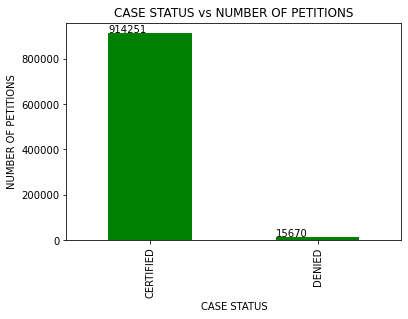

In [15]:
plot_status_number = table_2['CASE_STATUS'].value_counts().plot(title = 'CASE STATUS vs NUMBER OF PETITIONS', \
                                                                kind = 'bar', color = 'green')
plot_status_number.set_xlabel("CASE STATUS")
plot_status_number.set_ylabel("NUMBER OF PETITIONS")
for p in plot_status_number.patches:
    plot_status_number.annotate(str(p.get_height()), (p.get_x() * 1.0050, p.get_height() * 1.005))
plot_status_number

INFOSYS LIMITED                                    48632
TATA CONSULTANCY SERVICES LIMITED                  23053
WIPRO LIMITED                                      16236
CAPGEMINI AMERICA INC                              16032
ACCENTURE LLP                                      15890
IBM INDIA PRIVATE LIMITED                          15729
DELOITTE CONSULTING LLP                            11968
TECH MAHINDRA (AMERICAS),INC.                      9204 
HCL AMERICA, INC.                                  8846 
ERNST & YOUNG U.S. LLP                             7399 
MICROSOFT CORPORATION                              7099 
COGNIZANT TECHNOLOGY SOLUTIONS U.S. CORPORATION    6015 
IGATE TECHNOLOGIES INC.                            5079 
GOOGLE INC.                                        4755 
LARSEN & TOUBRO INFOTECH LIMITED                   4458 
Name: EMPLOYER_NAME, dtype: int64


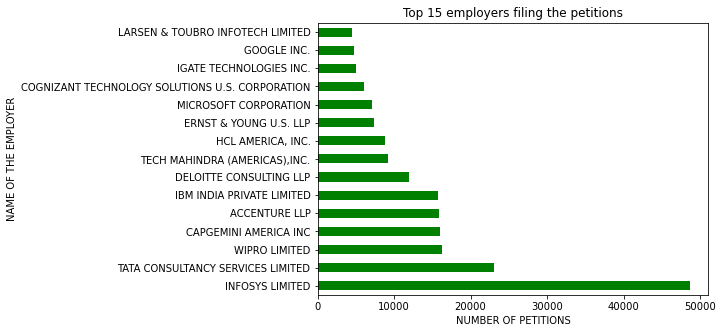

In [17]:
plot_status_topemp= table_2['EMPLOYER_NAME'].value_counts().head(15).plot.barh(title = "Top 15 employers filing the petitions", \
                                                                 color = 'green', figsize = (7, 5))
plot_status_topemp.set_ylabel("NAME OF THE EMPLOYER")
plot_status_topemp.set_xlabel("NUMBER OF PETITIONS")
plot_status_topemp
print(table_2['EMPLOYER_NAME'].value_counts().head(15))

SOFTWARE DEVELOPERS, APPLICATIONS                     162012
COMPUTER SYSTEMS ANALYSTS                             159803
COMPUTER PROGRAMMERS                                  130823
COMPUTER OCCUPATIONS, ALL OTHER                       81738 
SOFTWARE DEVELOPERS, SYSTEMS SOFTWARE                 28936 
MANAGEMENT ANALYSTS                                   22088 
ACCOUNTANTS AND AUDITORS                              17522 
COMPUTER SYSTEMS ANALYST                              17071 
NETWORK AND COMPUTER SYSTEMS ADMINISTRATORS           16416 
FINANCIAL ANALYSTS                                    13617 
MECHANICAL ENGINEERS                                  13260 
DATABASE ADMINISTRATORS                               12499 
MARKET RESEARCH ANALYSTS AND MARKETING SPECIALISTS    11970 
OPERATIONS RESEARCH ANALYSTS                          11116 
ELECTRONICS ENGINEERS, EXCEPT COMPUTER                9523  
Name: SOC_NAME, dtype: int64


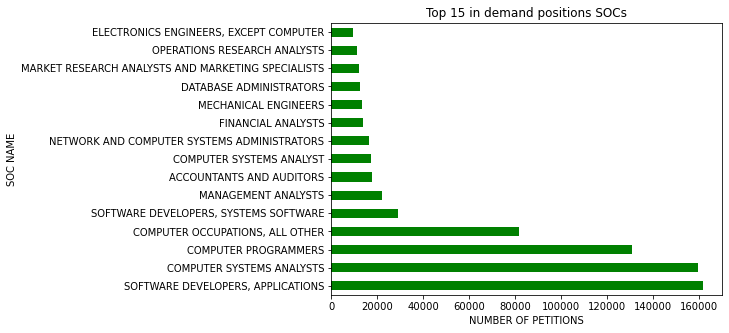

In [18]:
plot_status_topsoc= table_2['SOC_NAME'].value_counts().head(15).plot.barh(title = "Top 15 in demand positions SOCs", \
                                                                 color = 'green', figsize = (7, 5))
plot_status_topsoc.set_ylabel("SOC NAME")
plot_status_topsoc.set_xlabel("NUMBER OF PETITIONS")
plot_status_topsoc
print(table_2['SOC_NAME'].value_counts().head(15))

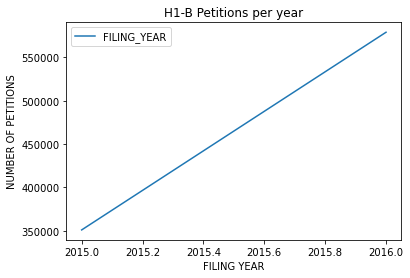

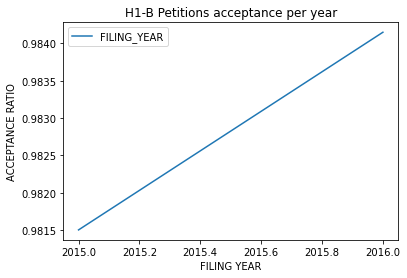

In [19]:
dfplot_status_fyear = pd.DataFrame(table_2['FILING_YEAR'].value_counts())
dfplot_status_fyear = dfplot_status_fyear.sort_values(['FILING_YEAR'])
plot_status_fyear = dfplot_status_fyear.plot(title = 'H1-B Petitions per year', kind = 'line')
plot_status_fyear.set_xlabel('FILING YEAR')
plot_status_fyear.set_ylabel('NUMBER OF PETITIONS')
plt.show()

dfstatus_acceptance_peryear = pd.DataFrame(table_2[table_2['CASE_STATUS'] == 'CERTIFIED'].FILING_YEAR.value_counts() / table_2.FILING_YEAR.value_counts())
dfstatus_acceptance_peryear = dfstatus_acceptance_peryear.sort_values(['FILING_YEAR'])
status_acceptance_peryear = dfstatus_acceptance_peryear.plot(title = 'H1-B Petitions acceptance per year', kind = 'line')
status_acceptance_peryear.set_xlabel('FILING YEAR')
status_acceptance_peryear.set_ylabel('ACCEPTANCE RATIO')
plt.show()

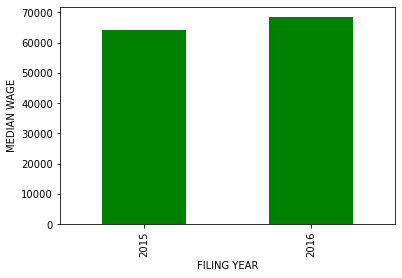

,PREVAILING_WAGE
,median
FILING_YEAR,
2015,64314.0
2016,68411.0


In [21]:
dfsalaries_trends_year = table_2.loc[:,['PREVAILING_WAGE', 'FILING_YEAR']].groupby(['FILING_YEAR']).agg(['median'])

plot_salaries_trends_year = dfsalaries_trends_year.plot(kind = 'bar', color = 'g', legend = None)
plot_salaries_trends_year.set_xlabel('FILING YEAR')
plot_salaries_trends_year.set_ylabel('MEDIAN WAGE')
plt.show()
dfsalaries_trends_year

In [22]:
print(table_2['CASE_STATUS'].unique())
table_2 = table_2.loc[table_2['CASE_STATUS'].isin(["CERTIFIED", "DENIED"])]

['CERTIFIED' 'DENIED']


In [23]:
table_2.isnull().sum(axis = 0)

CASE_STATUS           0    
EMPLOYER_NAME         12   
SOC_NAME              6    
JOB_TITLE             3    
FULL_TIME_POSITION    1    
PREVAILING_WAGE       3    
FILING_YEAR           0    
WORKSITE              0    
LONGITUDE             26082
LATITUDE              26082
dtype: int64

In [24]:
table_3 = table_2.dropna(axis=0, how='any', subset = ['EMPLOYER_NAME', 'SOC_NAME', 'JOB_TITLE', 
                                                      'FULL_TIME_POSITION', 'PREVAILING_WAGE'])

In [25]:
print(table_2.shape)
print(table_3.shape)

(929921, 10)
(929899, 10)


In [26]:
table_3.CASE_STATUS.value_counts()

CERTIFIED    914240
DENIED       15659 
Name: CASE_STATUS, dtype: int64

In [27]:
table_temp_2_Dx = table_3[table_3['CASE_STATUS'] == 'DENIED']

In [28]:
table_temp_2_Cx = table_3[table_3['CASE_STATUS'] == 'CERTIFIED']

In [29]:
Input_Certified, Input_Certified_extra, y_certified, y_certified_extra = train_test_split(table_3[table_3.CASE_STATUS == 'CERTIFIED'],\
                                                                                          table_temp_2_Cx.CASE_STATUS, train_size= 0.06, random_state=1)

In [30]:
training_dataframe = Input_Certified.append(table_temp_2_Dx)

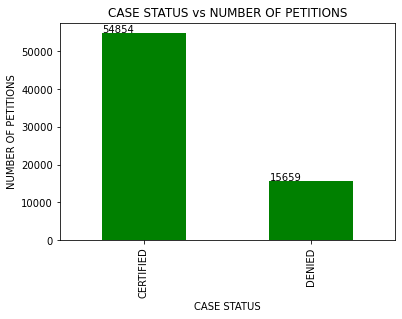

In [31]:
plot_after_ds = training_dataframe['CASE_STATUS'].value_counts().plot(title = 'CASE STATUS vs NUMBER OF PETITIONS', \
                                                                kind = 'bar', color = 'green')
plot_after_ds.set_xlabel("CASE STATUS")
plot_after_ds.set_ylabel("NUMBER OF PETITIONS")
for p in plot_after_ds.patches:
    plot_after_ds.annotate(str(p.get_height()), (p.get_x() * 1.0050, p.get_height() * 1.005))
plt.show()

In [32]:
print("Case Status ",training_dataframe.CASE_STATUS.nunique())
print("Unique Employers ",training_dataframe.EMPLOYER_NAME.nunique())
print("Prevailing Wages ",training_dataframe.PREVAILING_WAGE.nunique())
print("Unique SOCs ", training_dataframe.SOC_NAME.nunique())
print("Unique Job Titles ",training_dataframe.JOB_TITLE.nunique())
print("Unique Filing Year ",training_dataframe.FILING_YEAR.nunique())
print("Unique Worksite State ",training_dataframe.WORKSITE.nunique())
print("Unique Employment Type ", training_dataframe.FULL_TIME_POSITION.nunique())

Case Status  2
Unique Employers  23456
Prevailing Wages  10818
Unique SOCs  612
Unique Job Titles  17232
Unique Filing Year  2
Unique Worksite State  4198
Unique Employment Type  2


In [33]:
def wage_categorization(wage):
    if wage <=50000:
        return "VERY LOW"
    elif wage >50000 and wage <= 70000:
        return "LOW"
    elif wage >70000 and wage <= 90000:
        return "MEDIUM"
    elif wage >90000 and wage<=150000:
        return "HIGH"
    elif wage >=150000:
        return "VERY HIGH"

In [34]:
def categorisation_visagrant(ratio_of_acceptance):
    if ratio_of_acceptance == -1:
        return "AR"
    elif ratio_of_acceptance >=0.0 and ratio_of_acceptance<0.20:
        return "VLA"
    elif ratio_of_acceptance>=0.20 and ratio_of_acceptance<0.40:
        return "LA"
    elif ratio_of_acceptance>=0.40 and ratio_of_acceptance<0.60:
        return "MA"
    elif ratio_of_acceptance>=0.60 and ratio_of_acceptance<0.80:
        return "HA"
    elif ratio_of_acceptance>=0.80:
        return "VHA"

In [35]:
def state_extractor(work_site):
    return work_site.split(', ')[1]

In [36]:
training_dataframe['WORKSITE'] = training_dataframe['WORKSITE'].apply(state_extractor)

In [37]:
training_dataframe.WORKSITE.unique()

array(['NEW YORK', 'NEW JERSEY', 'KENTUCKY', 'CALIFORNIA', 'KANSAS',
       'WASHINGTON', 'FLORIDA', 'NEBRASKA', 'WISCONSIN', 'GEORGIA',
       'TEXAS', 'TENNESSEE', 'ILLINOIS', 'MINNESOTA', 'MARYLAND',
       'NORTH CAROLINA', 'MICHIGAN', 'VIRGINIA', 'ARKANSAS', 'MISSOURI',
       'IOWA', 'OKLAHOMA', 'PENNSYLVANIA', 'CONNECTICUT', 'OREGON',
       'UTAH', 'IDAHO', 'OHIO', 'COLORADO', 'ARIZONA', 'MASSACHUSETTS',
       'SOUTH CAROLINA', 'DISTRICT OF COLUMBIA', 'NEVADA', 'INDIANA',
       'ALABAMA', 'RHODE ISLAND', 'NEW MEXICO', 'NEW HAMPSHIRE',
       'SOUTH DAKOTA', 'LOUISIANA', 'MAINE', 'DELAWARE', 'MISSISSIPPI',
       'NA', 'NORTH DAKOTA', 'VERMONT', 'MONTANA', 'HAWAII',
       'WEST VIRGINIA', 'ALASKA', 'PUERTO RICO', 'WYOMING'], dtype=object)

In [38]:
training_dataframe['WAGE_CATEGORY'] = training_dataframe['PREVAILING_WAGE'].apply(wage_categorization)

In [39]:
training_dataframe_1 = training_dataframe.loc[:,['EMPLOYER_NAME', 'CASE_STATUS']]
training_dataframe_1s = training_dataframe.loc[:,['SOC_NAME', 'CASE_STATUS']]
training_dataframe_1j = training_dataframe.loc[:,['JOB_TITLE', 'CASE_STATUS']]

In [40]:
training_dataframe_2_C = training_dataframe_1[training_dataframe_1.CASE_STATUS == 'CERTIFIED'].EMPLOYER_NAME
training_dataframe_2_Cs = training_dataframe_1s[training_dataframe_1s.CASE_STATUS == 'CERTIFIED'].SOC_NAME
training_dataframe_2_Cj = training_dataframe_1j[training_dataframe_1j.CASE_STATUS == 'CERTIFIED'].JOB_TITLE
positive_counts = training_dataframe_2_C.value_counts()
positive_counts_s = training_dataframe_2_Cs.value_counts()
positive_counts_j = training_dataframe_2_Cj.value_counts()

In [41]:
total_counts = training_dataframe_1.EMPLOYER_NAME.value_counts()
total_counts_s = training_dataframe_1s.SOC_NAME.value_counts()
total_counts_j = training_dataframe_1j.JOB_TITLE.value_counts()

In [42]:
final_ratio_series = positive_counts / total_counts

final_ratio_series.fillna(-1, inplace=True)
final_classification_employer = final_ratio_series.apply(categorisation_visagrant)
training_dataframe['EMPLOYER_ACCEPTANCE'] = training_dataframe.EMPLOYER_NAME.map(final_classification_employer)

In [43]:
final_ratio_series_s = positive_counts_s / total_counts_s
final_ratio_series_s.fillna(-1, inplace=True)
final_classification_soc = final_ratio_series_s.apply(categorisation_visagrant)
training_dataframe['SOC_ACCEPTANCE'] = training_dataframe.SOC_NAME.map(final_classification_soc)

In [44]:
final_ratio_series_j = positive_counts_j / total_counts_j
final_ratio_series_j.fillna(-1, inplace=True)
final_classification_job = final_ratio_series_j.apply(categorisation_visagrant)
training_dataframe['JOB_ACCEPTANCE'] = training_dataframe.JOB_TITLE.map(final_classification_job)

In [45]:
print("Case Status ",training_dataframe.CASE_STATUS.nunique())
print("Unique Employers ",training_dataframe.EMPLOYER_ACCEPTANCE.nunique())
print("Wages Category", training_dataframe.WAGE_CATEGORY.nunique())
print("Unique SOCs ", training_dataframe.SOC_ACCEPTANCE.nunique())
print("Unique Job Titles ",training_dataframe.JOB_ACCEPTANCE.nunique())
print("Unique Filing Year ",training_dataframe.FILING_YEAR.nunique())
print("Unique Worksite State ",training_dataframe.WORKSITE.nunique())
print("Unique Employment Type ", training_dataframe.FULL_TIME_POSITION.nunique())

Case Status  2
Unique Employers  6
Wages Category 5
Unique SOCs  6
Unique Job Titles  6
Unique Filing Year  2
Unique Worksite State  53
Unique Employment Type  2


In [46]:
dict_cs = {"CERTIFIED" : 1, "DENIED": 0}
dict_fp = {"Y" : 1, "N" : 0}
try:
    
    training_dataframe['CASE_STATUS'] = training_dataframe['CASE_STATUS'].apply(lambda x: dict_cs[x])
    training_dataframe['FULL_TIME_POSITION'] = training_dataframe['FULL_TIME_POSITION'].apply(lambda x: dict_fp[x])
except:
    pass

In [47]:
training_dataframe['FILING_YEAR'] = training_dataframe['FILING_YEAR'].astype('int')
training_dataframe.sort_index(inplace = True)
training_dataframe = training_dataframe.loc[:, ['CASE_STATUS', 'FILING_YEAR',\
                                                'WORKSITE', 'WAGE_CATEGORY',  'EMPLOYER_ACCEPTANCE', 'JOB_ACCEPTANCE', 'SOC_ACCEPTANCE', 'FULL_TIME_POSITION']]
training_dataframe.head()

,CASE_STATUS,FILING_YEAR,WORKSITE,WAGE_CATEGORY,EMPLOYER_ACCEPTANCE,JOB_ACCEPTANCE,SOC_ACCEPTANCE,FULL_TIME_POSITION
40,0,2016,WASHINGTON,VERY HIGH,AR,LA,LA,1
48,0,2016,CALIFORNIA,VERY HIGH,AR,MA,LA,1
71,1,2016,PENNSYLVANIA,VERY HIGH,VHA,MA,LA,1
92,0,2016,MICHIGAN,HIGH,AR,LA,LA,1
96,0,2016,ILLINOIS,VERY HIGH,AR,AR,LA,1


In [48]:
final_df_train = pd.get_dummies(training_dataframe, columns=['FILING_YEAR', 'WORKSITE', 'FULL_TIME_POSITION', 'WAGE_CATEGORY', 'EMPLOYER_ACCEPTANCE',
                                                             
                                                                'JOB_ACCEPTANCE', 'SOC_ACCEPTANCE' ], drop_first=True)
final_df_train.head()

,CASE_STATUS,FILING_YEAR_2016,WORKSITE_ALASKA,WORKSITE_ARIZONA,WORKSITE_ARKANSAS,WORKSITE_CALIFORNIA,WORKSITE_COLORADO,WORKSITE_CONNECTICUT,WORKSITE_DELAWARE,WORKSITE_DISTRICT OF COLUMBIA,...,JOB_ACCEPTANCE_HA,JOB_ACCEPTANCE_LA,JOB_ACCEPTANCE_MA,JOB_ACCEPTANCE_VHA,JOB_ACCEPTANCE_VLA,SOC_ACCEPTANCE_HA,SOC_ACCEPTANCE_LA,SOC_ACCEPTANCE_MA,SOC_ACCEPTANCE_VHA,SOC_ACCEPTANCE_VLA
40,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
48,0,1,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
71,1,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
92,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
96,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [49]:
model = LogisticRegression()
rfe = RFE(model, 30)
fit = rfe.fit(final_df_train.iloc[:,1:], final_df_train.iloc[:,0])
support_rfe = rfe.support_
length_cols = list(final_df_train.iloc[:,1:].columns.values)
list_selected = []
for index in range(len(length_cols)):
    if support_rfe[index] == True:
        list_selected.append(length_cols[index])
    else:
        pass
print(list_selected)
print(rfe.ranking_)

C:\Users\SivaTharun\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=30 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
C:\Users\SivaTharun\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\SivaTharun\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS RE

['WORKSITE_ARKANSAS', 'WORKSITE_DELAWARE', 'WORKSITE_HAWAII', 'WORKSITE_IDAHO', 'WORKSITE_INDIANA', 'WORKSITE_IOWA', 'WORKSITE_KENTUCKY', 'WORKSITE_MAINE', 'WORKSITE_NA', 'WORKSITE_NORTH DAKOTA', 'WORKSITE_OKLAHOMA', 'WORKSITE_OREGON', 'WORKSITE_SOUTH CAROLINA', 'WORKSITE_VERMONT', 'WAGE_CATEGORY_VERY HIGH', 'WAGE_CATEGORY_VERY LOW', 'EMPLOYER_ACCEPTANCE_HA', 'EMPLOYER_ACCEPTANCE_LA', 'EMPLOYER_ACCEPTANCE_MA', 'EMPLOYER_ACCEPTANCE_VHA', 'EMPLOYER_ACCEPTANCE_VLA', 'JOB_ACCEPTANCE_HA', 'JOB_ACCEPTANCE_LA', 'JOB_ACCEPTANCE_MA', 'JOB_ACCEPTANCE_VHA', 'JOB_ACCEPTANCE_VLA', 'SOC_ACCEPTANCE_HA', 'SOC_ACCEPTANCE_LA', 'SOC_ACCEPTANCE_MA', 'SOC_ACCEPTANCE_VLA']
[ 4 44  9  1 31 26 20  1  8 24 10  1  1 34  1  1 43  1 11  1 12 38 28 23
 18 30 32  1 17  2  6 21  5 27 36  1 25  1  1 13 41 19  1  3 39 29 33  1
 16 15 22 40  7 37 14 42  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 35
  1]


In [50]:
unique_listcols = [col.split('_')[0] for col in list_selected]
set(unique_listcols)

{'EMPLOYER', 'JOB', 'SOC', 'WAGE', 'WORKSITE'}

In [51]:
X_train, X_test, y_train, y_test = train_test_split(final_df_train.iloc[:,1:], final_df_train.iloc[:, 0], test_size = 0.20, random_state=1)
y_test[y_test==1].shape

(10954,)

In [52]:
X_train.head()

,FILING_YEAR_2016,WORKSITE_ALASKA,WORKSITE_ARIZONA,WORKSITE_ARKANSAS,WORKSITE_CALIFORNIA,WORKSITE_COLORADO,WORKSITE_CONNECTICUT,WORKSITE_DELAWARE,WORKSITE_DISTRICT OF COLUMBIA,WORKSITE_FLORIDA,...,JOB_ACCEPTANCE_HA,JOB_ACCEPTANCE_LA,JOB_ACCEPTANCE_MA,JOB_ACCEPTANCE_VHA,JOB_ACCEPTANCE_VLA,SOC_ACCEPTANCE_HA,SOC_ACCEPTANCE_LA,SOC_ACCEPTANCE_MA,SOC_ACCEPTANCE_VHA,SOC_ACCEPTANCE_VLA
78592,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
570727,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
697699,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
418394,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
540855,1,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,1,0,0,0,0


In [53]:
dtree = tree.DecisionTreeClassifier()
dtree = dtree.fit(X_train, y_train)   

In [54]:
y_pred = dtree.predict(X_test)

y_prob = dtree.predict_proba(X_test)

print("test", y_test[:10])
print("pred", y_pred[:10])
print()

print(metrics.confusion_matrix(y_test,y_pred))
print(metrics.classification_report(y_test, y_pred))

test 474442    1
52043     0
275747    1
457862    1
769387    1
288444    0
71038     1
493316    0
347912    0
856739    1
Name: CASE_STATUS, dtype: int64
pred [1 0 1 1 1 1 1 1 0 1]

[[ 2431   718]
 [  366 10588]]
              precision    recall  f1-score   support

           0       0.87      0.77      0.82      3149
           1       0.94      0.97      0.95     10954

    accuracy                           0.92     14103
   macro avg       0.90      0.87      0.88     14103
weighted avg       0.92      0.92      0.92     14103



In [55]:
lr_clf = linear_model.LogisticRegression()
lr_clf.fit(X_train, y_train)  

C:\Users\SivaTharun\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [56]:
y_pred_lr = lr_clf.predict(X_test)

probs = lr_clf.predict_proba(X_test)

print("test", y_test[:10])
print("pred", y_pred_lr[:10])

print(metrics.confusion_matrix(y_test,y_pred_lr))
print(metrics.classification_report(y_test, y_pred_lr))

test 474442    1
52043     0
275747    1
457862    1
769387    1
288444    0
71038     1
493316    0
347912    0
856739    1
Name: CASE_STATUS, dtype: int64
pred [1 0 1 1 1 1 1 1 0 1]
[[ 2401   748]
 [  184 10770]]
              precision    recall  f1-score   support

           0       0.93      0.76      0.84      3149
           1       0.94      0.98      0.96     10954

    accuracy                           0.93     14103
   macro avg       0.93      0.87      0.90     14103
weighted avg       0.93      0.93      0.93     14103



In [57]:
rf = RandomForestClassifier(n_estimators = 75, random_state = 50)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=75, random_state=50)

In [58]:
y_pred_rf =  rf.predict(X_test)
probs = rf.predict_proba(X_test)

print("test", y_test[:10])
print("pred", y_pred[:10])
print(metrics.confusion_matrix(y_test,y_pred_rf))
print(metrics.classification_report(y_test, y_pred_rf))

test 474442    1
52043     0
275747    1
457862    1
769387    1
288444    0
71038     1
493316    0
347912    0
856739    1
Name: CASE_STATUS, dtype: int64
pred [1 0 1 1 1 1 1 1 0 1]
[[ 2417   732]
 [  313 10641]]
              precision    recall  f1-score   support

           0       0.89      0.77      0.82      3149
           1       0.94      0.97      0.95     10954

    accuracy                           0.93     14103
   macro avg       0.91      0.87      0.89     14103
weighted avg       0.92      0.93      0.92     14103



In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(20,20,20,20,20), max_iter=1000)
mlp.fit(X_train, y_train)

In [ ]:
y_pred_mlp = mlp.predict(X_test)
confusion = metrics.confusion_matrix(y_test, y_pred_mlp)
print(confusion)
print(metrics.classification_report(y_test, y_pred_mlp))

In [ ]:
gaus_clf = GaussianNB()
gaus_clf.fit(X_train, y_train)

In [65]:
y_pred_glb = gaus_clf.predict(X_test)
confusion = metrics.confusion_matrix(y_test, y_pred_glb)
print(confusion)
print(metrics.classification_report(y_test, y_pred_glb))

[[ 1122  2027]
 [  837 10117]]
              precision    recall  f1-score   support

           0       0.57      0.36      0.44      3149
           1       0.83      0.92      0.88     10954

    accuracy                           0.80     14103
   macro avg       0.70      0.64      0.66     14103
weighted avg       0.77      0.80      0.78     14103

